In [1]:
import numpy as np
import pandas as pd

In [10]:
df = pd.read_csv("Insurance_Dataset.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,SouthInterior,337698.48
1,18,male,33.770,1,no,SouthCostal,34511.05
2,28,male,33.000,3,no,SouthCostal,88989.24
3,33,male,22.705,0,no,NorthInterior,439689.41
4,32,male,28.880,0,no,NorthInterior,77337.10


In [11]:
df.shape

(1338, 7)

In [12]:
dummy1 = pd.get_dummies(df.sex, drop_first=True)
df1 = pd.concat([df,dummy1],axis="columns")
df2 = df1.drop('sex', axis="columns")
df2.head()

,age,bmi,children,smoker,region,charges,male
0,19,27.900,0,yes,SouthInterior,337698.48,0
1,18,33.770,1,no,SouthCostal,34511.05,1
2,28,33.000,3,no,SouthCostal,88989.24,1
3,33,22.705,0,no,NorthInterior,439689.41,1
4,32,28.880,0,no,NorthInterior,77337.10,1


In [13]:
dummy2 = pd.get_dummies(df2.smoker, drop_first=True)
df3 = pd.concat([df2, dummy2], axis="columns")
df4 = df3.drop('smoker', axis="columns")
df4.head()

,age,bmi,children,region,charges,male,yes
0,19,27.900,0,SouthInterior,337698.48,0,1
1,18,33.770,1,SouthCostal,34511.05,1,0
2,28,33.000,3,SouthCostal,88989.24,1,0
3,33,22.705,0,NorthInterior,439689.41,1,0
4,32,28.880,0,NorthInterior,77337.10,1,0


In [14]:
dummy3 = pd.get_dummies(df4.region, drop_first=True)
df5 = pd.concat([df4, dummy3], axis="columns")
df6 = df5.drop('region', axis="columns")
df6.head()

,age,bmi,children,charges,male,yes,NorthInterior,SouthCostal,SouthInterior
0,19,27.900,0,337698.48,0,1,0,0,1
1,18,33.770,1,34511.05,1,0,0,1,0
2,28,33.000,3,88989.24,1,0,0,1,0
3,33,22.705,0,439689.41,1,0,1,0,0
4,32,28.880,0,77337.10,1,0,1,0,0


In [15]:
final_dataset = df6

In [16]:
x = df6.drop('charges', axis='columns')
x.head()

,age,bmi,children,male,yes,NorthInterior,SouthCostal,SouthInterior
0,19,27.900,0,0,1,0,0,1
1,18,33.770,1,1,0,0,1,0
2,28,33.000,3,1,0,0,1,0
3,33,22.705,0,1,0,1,0,0
4,32,28.880,0,1,0,1,0,0


In [17]:
y = df6.charges
y.head()

0    337698.48
1     34511.05
2     88989.24
3    439689.41
4     77337.10
Name: charges, dtype: float64

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [19]:
from sklearn.linear_model import LinearRegression
lr_clf = LinearRegression()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.695328683902106

In [20]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.7999877 , 0.74681637, 0.71122938, 0.77267833, 0.80772081])

In [21]:
from sklearn.ensemble import RandomForestRegressor
lr_clf = RandomForestRegressor()
lr_clf.fit(x_train,y_train)
lr_clf.score(x_test,y_test)

0.8044283163506836

In [22]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
cross_val_score(RandomForestRegressor(), x, y, cv=cv)

array([0.87856934, 0.8471721 , 0.83433421, 0.86226304, 0.90679677])

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

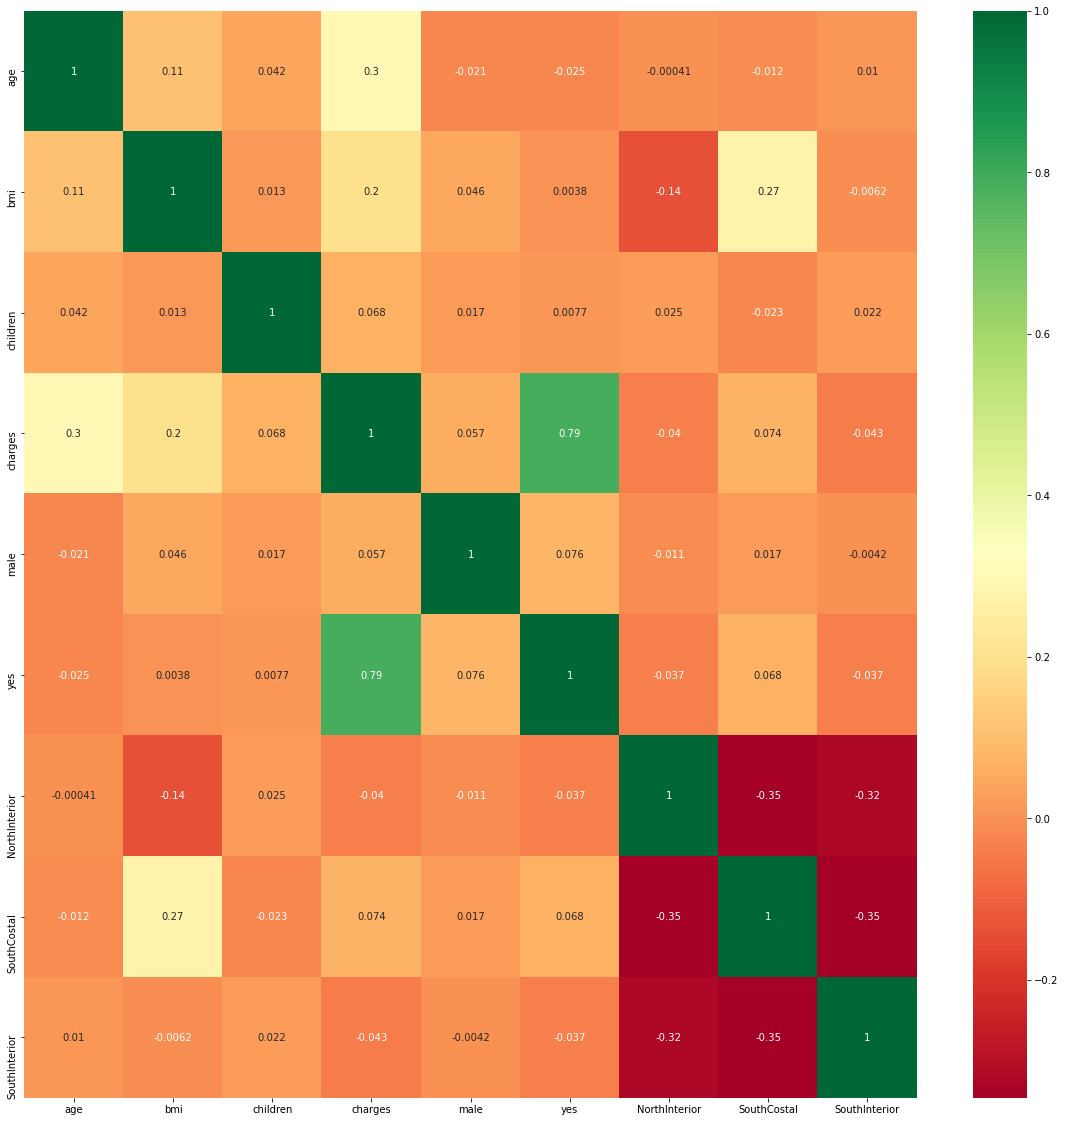

In [24]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [25]:
n_estimators = [50,100,200,300,400,500]
max_features = ['auto', 'sqrt']
max_depth = [5,10,15,20,25,30]
min_samples_split=[2,5,10,15,20]
min_samples_leaf=[1,2,3,5,10]

In [26]:
from sklearn.model_selection import RandomizedSearchCV

In [27]:
random_grid = {'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}
print(random_grid)

{'n_estimators': [50, 100, 200, 300, 400, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 20], 'min_samples_leaf': [1, 2, 3, 5, 10]}


In [28]:
rf = RandomForestRegressor()
model = RandomizedSearchCV(estimator = rf, param_distributions=random_grid, scoring='neg_mean_squared_error', n_iter=10, cv=5, verbose=2, random_state=40, n_jobs=1)
model.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.3s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25 
[CV]  n_estimators=50, min_samples_split=2, min_samples_leaf=1, max_features=sqrt, max_depth=25, total=   0.2s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=5 
[CV]  n_estimators=300, min_samples_split=5, min_samples_leaf=3, max_features=sqrt, max_depth=5, total=   0.9s
[CV] n_estimators=300, min_samples_split=5, min_samples_leaf=

[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.9s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25 
[CV]  n_estimators=200, min_samples_split=2, min_samples_leaf=5, max_features=auto, max_depth=25, total=   0.8s
[CV] n_estimators=200, min_samples_split=20, min_samples_leaf=1, max_features=auto, max_depth=15 
[CV]  n_estimators=200, min_samples_split=20, min_samples_leaf=1, max_features=auto, max_depth=15, total=   0.8s
[CV] n_estimators=200, min_samples_split=20, min_s

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   34.3s finished


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [50, 100, 200, 300, 400,
                                                         500]},
                   random_state=40, scoring='neg_mean_squared_error',
                   verbose=2)

In [29]:
model.best_params_

{'n_estimators': 400,
 'min_samples_split': 5,
 'min_samples_leaf': 10,
 'max_features': 'auto',
 'max_depth': 25}

In [30]:
predictions=model.predict(x_test)
predictions

array([142840.72404297, 106790.03959462, 360461.4324706 , 295199.62133642,
        82894.24340514, 143264.68780658, 192531.8232211 , 358904.0748754 ,
       182736.38986208, 455551.03758874, 103049.41154995,  90201.57423332,
       155218.65968629, 163586.27723503, 205294.96278291, 300992.14180383,
       106587.38923004, 382060.5079645 , 238689.7269974 , 409780.32519785,
       825520.05099234,  52117.15564785,  45185.64234361, 128667.46698938,
       132340.06541183, 275643.22460992, 193418.59692528, 285382.43643144,
       119252.13464964, 418548.54396269,  36123.95105135, 798737.63576421,
       163946.14212714, 189631.16162589, 126073.04187743, 169407.39152634,
       278067.05260842, 240780.36583366, 222534.70189341, 210268.0116781 ,
       287795.86397377, 218644.06927281, 106819.33604507, 162821.52665593,
        52109.88789785, 141768.68492018, 178288.2342824 , 787526.60066999,
       283992.09865865, 247504.69529111, 791916.63650943,  96703.71587191,
       165583.54624366, 2

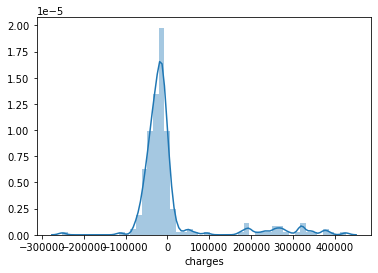

In [31]:
sns.distplot(y_test-predictions)

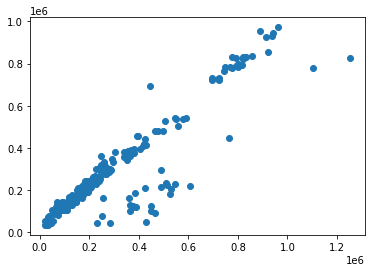

In [32]:
plt.scatter(y_test,predictions)

In [33]:
final_dataset.head()

,age,bmi,children,charges,male,yes,NorthInterior,SouthCostal,SouthInterior
0,19,27.900,0,337698.48,0,1,0,0,1
1,18,33.770,1,34511.05,1,0,0,1,0
2,28,33.000,3,88989.24,1,0,0,1,0
3,33,22.705,0,439689.41,1,0,1,0,0
4,32,28.880,0,77337.10,1,0,1,0,0


In [34]:
model.predict([[19,27.9,0,1,1,0,0,1]])

array([369123.02445501])

In [35]:
model.predict([[19,27.9,3,1,1,0,0,0]])

array([369082.23932061])

In [36]:
import pickle
with open('InsuranceCostPrediction.pkl','wb') as f:
    pickle.dump(model,f)

In [37]:
import json
columns = {
    'data_columns':[col.lower() for col in x.columns]
}
with open("columns.json","w") as jf:
    jf.write(json.dumps(columns))